In [1]:
import os
import pandas as pd
from pmdarima.arima import auto_arima
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
os.chdir(r"D:\March 2024\PML\Datasets")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_404\3293653896.py:1: SyntaxWarning: invalid escape sequence '\M'
  shamp = pd.read_csv('D:\March 2024\PML\Datasets\sales-of-shampoo-over-a-three-ye.csv')


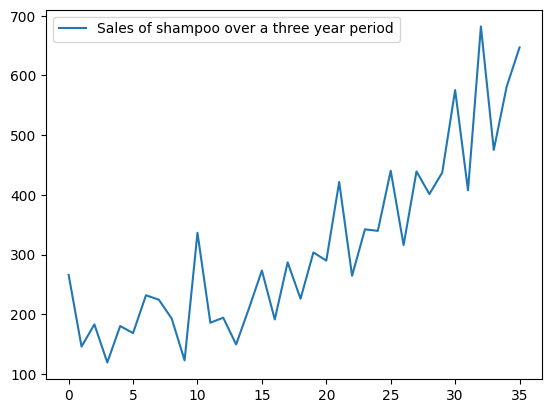

In [3]:
shamp = pd.read_csv('D:\March 2024\PML\Datasets\sales-of-shampoo-over-a-three-ye.csv')
shamp.plot()
plt.show()

In [4]:
y = shamp['Sales of shampoo over a three year period']
y_train = y[:-6]
y_test = y[-6:]

In [5]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.798 seconds


In [6]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

forecast

,Prediction
30,421.155269
31,441.581554
32,450.225654
33,458.869755
34,467.513856
35,476.157956


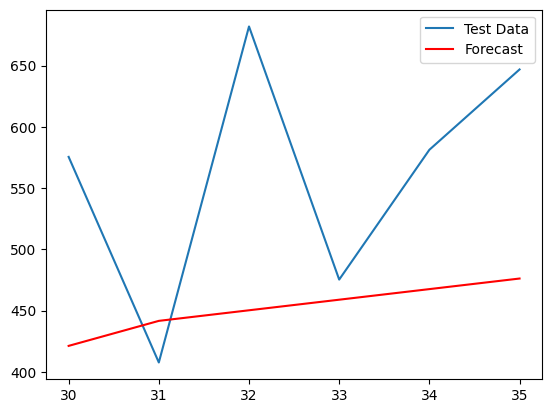

In [7]:
# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

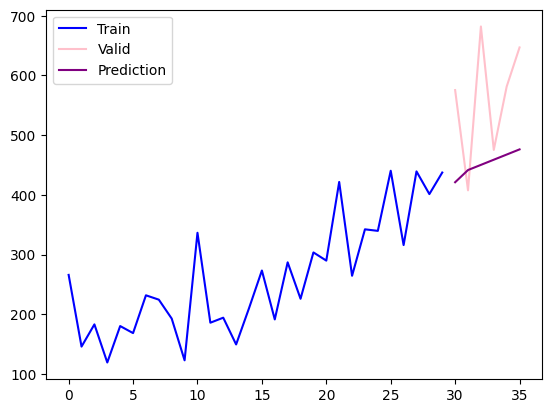

In [8]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [9]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 142.048


SARIMA

In [10]:
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=346.449, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=325.552, Time=1.00 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=344.577, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=329.759, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=327.544, Time=1.76 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=327.542, Time=1.82 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=325.742, Time=0.29 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=344.139, Time=0.19 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=325.838, Time=0.40 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=322.439, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=327.141, Time=0.31 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=32

In [11]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

forecast

,Prediction
30,420.936867
31,421.585847
32,427.933819
33,368.840902
34,477.649005
35,445.885187


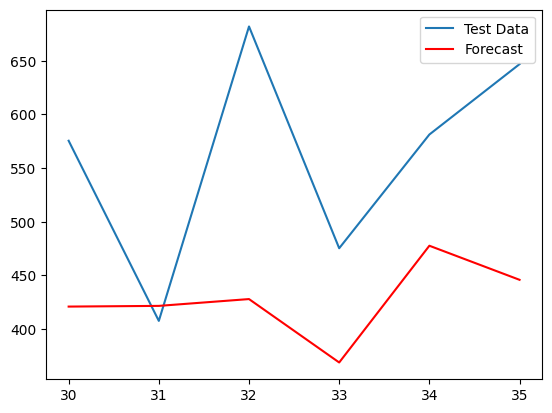

In [12]:
# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

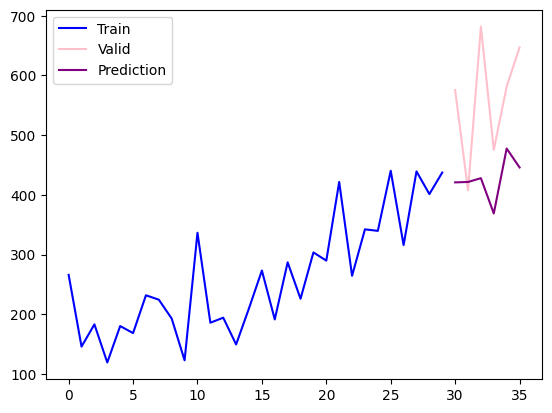

In [13]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [14]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 158.703
